In [73]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [74]:
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [75]:
one_hot_encode_df = pd.get_dummies(df, columns = ['X', 'Y'])
one_hot_encode_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,1,0,0,0,0,0,1,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,1,0,0,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,0,1,0,0,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,0,1,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,0,1,0,0


In [76]:
one_hot_encode_df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
one_hot_encode_df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
one_hot_encode_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,1,0,0,0,0,0,1,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,1,0,0,0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,0,1,0,0,0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,0,1,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,1,0,0,0,0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,1,0,0,0,0,1,0,0,0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
one_hot_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    int64  
 1   day     517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  X_1     517 non-null    uint8  
 12  X_2     517 non-null    uint8  
 13  X_3     517 non-null    uint8  
 14  X_4     517 non-null    uint8  
 15  X_5     517 non-null    uint8  
 16  X_6     517 non-null    uint8  
 17  X_7     517 non-null    uint8  
 18  X_8     517 non-null    uint8  
 19  X_9     517 non-null    uint8  
 20  Y_2     517 non-null    uint8  
 21  Y_3     517 non-null    uint8  
 22  Y_

In [78]:
one_hot_encode_df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.116054,0.117988,0.025145,0.085106,0.123791,0.392650,0.241779,0.143133,0.001934,0.011605
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.320600,0.322907,0.156717,0.279310,0.329662,0.488813,0.428576,0.350548,0.043980,0.107205
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
one_hot_encode_df.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,...,0.027756,0.063221,-0.082508,0.006292,0.060821,0.025098,-0.092342,0.043210,0.010149,-0.094159
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,...,0.088792,-0.039985,-0.020100,-0.008047,-0.018683,0.044726,-0.018321,-0.016482,-0.026767,0.012600
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,...,0.023565,0.039765,-0.014966,0.046927,0.021875,0.003038,-0.067651,0.028637,0.008424,-0.030024
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,...,0.027754,0.126852,-0.054997,0.046066,-0.050771,0.004340,-0.063384,0.091666,0.055405,-0.052763
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,...,0.035031,0.066111,-0.096092,0.028136,0.066953,0.036422,-0.087518,-0.002544,0.015625,-0.093477
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,...,0.092009,0.029720,-0.016223,0.051964,-0.069349,0.052523,-0.052770,0.026914,-0.011807,-0.033820
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,...,-0.046690,0.075102,0.102736,0.031518,0.068331,-0.037964,-0.056184,0.018567,0.055480,0.021995
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,...,0.136960,0.038406,-0.033153,-0.047914,-0.059605,0.033650,-0.007212,0.062907,-0.022382,-0.012994
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,...,0.053456,-0.026375,-0.064388,-0.020814,-0.015508,0.059585,-0.019182,-0.016053,0.011864,-0.045460
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,...,0.145019,-0.006519,-0.011767,-0.022347,-0.027540,-0.021403,0.068634,-0.007530,-0.003225,-0.007939


# Gaining insights with learning models

In [80]:
feature_df = one_hot_encode_df.drop(['area'], axis = 1)
feature_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,1,0,0,0,0,0,1,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,1,0,0,0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,0,1,0,0,0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,0,1,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,1,0,0,0,0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,1,0,0,0,0,1,0,0,0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
label_df = one_hot_encode_df['area']
label_df = pd.DataFrame(label_df)
label_df

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
512,6.44
513,54.29
514,11.16
515,0.00


In [96]:
train_x, test_x, train_y, test_y = train_test_split(feature_df, label_df, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

# Linear Regression

In [97]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

# print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


Mean squared error:  2055.6345135903052
Variance score: -0.12


# Decision Tree

In [98]:
decision_tree = tree.DecisionTreeRegressor()

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

Mean squared error:  5758.527117467947
Variance score: -2.14


# MLP

In [99]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

D:\Personal\codes\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error:  1831.0825923587197
Variance score: 0.00


D:\Personal\codes\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# SVM

In [100]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

Mean squared error:  2049.541070814929
Variance score: -0.12


D:\Personal\codes\python\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Random Forest

In [101]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7460\4129115768.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_x, train_y)


Mean squared error:  2284.709268214727
Variance score: -0.25


# Bayesian Ridge

In [102]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

Mean squared error:  1841.3994088949582
Variance score: -0.01


D:\Personal\codes\python\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Lasso

In [103]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

Mean squared error:  1942.2445251888466
Variance score: -0.06


In [108]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

In [109]:

mse_values

[2055.6345135903052,
 5758.527117467947,
 1831.0825923587197,
 2049.541070814929,
 2284.709268214727,
 1841.3994088949582,
 1942.2445251888466]

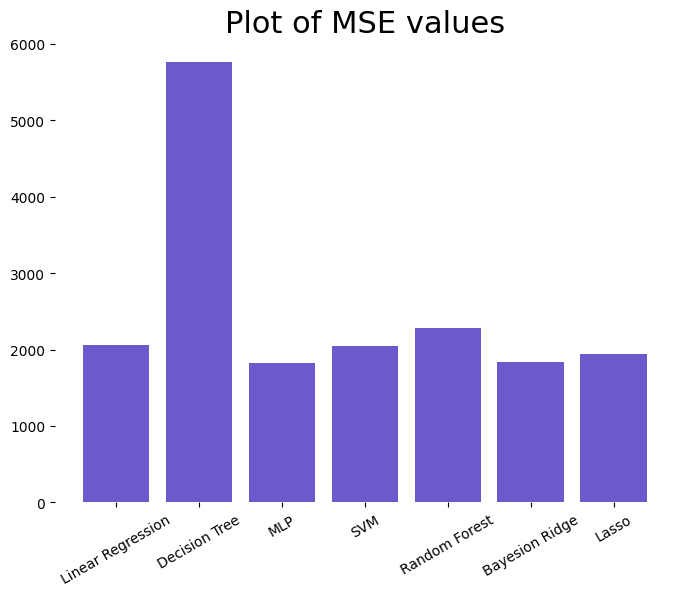

In [111]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

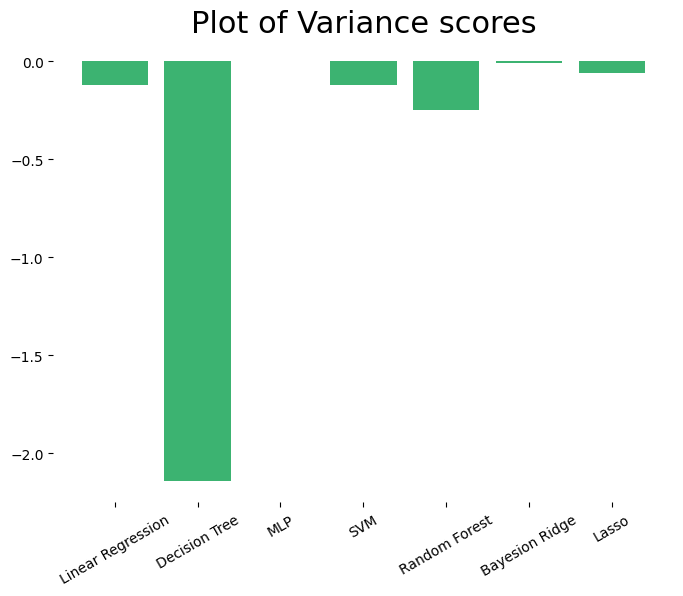

In [112]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

# Normalisation of all data

In [122]:
x1_values = list(forest_fires['X_1'])
x2_values = list(forest_fires['X_2'])
x3_values = list(forest_fires['X_3'])
x4_values = list(forest_fires['X_4'])
x5_values = list(forest_fires['X_5'])
x6_values = list(forest_fires['X_6'])
x7_values = list(forest_fires['X_7'])
x8_values = list(forest_fires['X_8'])
x9_values = list(forest_fires['X_9'])
y_values = list(forest_fires['Y_2'])
y_values = list(forest_fires['Y_3'])
y_values = list(forest_fires['Y_'])
y_values = list(forest_fires['Y'])
y_values = list(forest_fires['Y'])
y_values = list(forest_fires['Y'])
y_values = list(forest_fires['Y'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

NameError: name 'month_values' is not defined

# Creating the Keras neural network

In [119]:
model = Sequential()
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(1, activation='sigmoid'))

# Training Fitting and Evaluating

In [121]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(train_x,train_y, epochs=100, batch_size=10)

# Evaluate the model
scores = model.evaluate(test_x, test_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100


ValueError: in user code:

    File "D:\Personal\codes\python\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "D:\Personal\codes\python\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Personal\codes\python\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "D:\Personal\codes\python\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "D:\Personal\codes\python\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Personal\codes\python\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 26)


# ANN

In [118]:
train_x_a = np.array(train_x)
test_x_a = np.array(test_x)
test_y_a = np.array(test_y)
train_y_temp = np.array(train_y)

train_y_cl = []
for i in range(len(train_y)):
    if(train_y[i]>0):
        train_y_cl.append(1)
    else:
        train_y_cl.append(0)
train_y_cl = np.array(train_y_cl)

print("Length of Training data is : "+str(len(train_x_a))+" and Test data is : " + str(len(test_x_a)))

KeyError: 0